<a href="https://colab.research.google.com/github/sowmyaannadatha/Predictive-Time-Series-Analysis-from-sensor-data/blob/main/Predictive_Time_Series_Analysis_from_Sensor_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series - Centrifuges dataset (Publicly available dataset)

## Introduction:

- Proof of Concept study.
- This public dataset is from a sewage water recycling unit.
- The recyling plant has 4 centrifuges to seperate fluids of different densities . (liquids from solids)
- The liquid is processed in such a way that the water is safe to return to environment.
- The solids are processed into organic fertilizers.

## Problem Statement:
- The centrifuges are stopping all of sudden leaving damages that could take several days for repair.They don't know which features are effecting the stop.
- Predict Unwanted and uncontrollable stop of centrifuge with data from sensors.
- Develop an alarming system that could handle sudden stop of centrifuge.

## Dataset :

The Dataset has one year (Jun 2019 to May 2020) of minutes data of 4 centrifuges collected from 21 sensors.







# Data Loading , Wrangling of Centrifuge 1 with Analysis of Normal and Critical scenarios with Data Visualization

In [ ]:
#import libraries
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


mpl.rcParams['figure.figsize'] = (17, 5)
mpl.rcParams['axes.grid'] = False
sns.set_style("whitegrid")



# Load Data

In [ ]:
# load entire excel file to df_centrifuge1
df_centrifuge1 = pd.ExcelFile('InnovationLad_Samn_HistorianDataCentrifuge_1.xlsx')
# create empty list
df_appended__centrifuge1 = []
# loop for loading each sheet from df_centrifuge1 to pre process data
for i in range(2,len(df_centrifuge1.sheet_names)) :
    df = pd.read_excel (df_centrifuge1,sheet_name = i)
    df.drop(['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'], axis=1,inplace = True)
    df.columns = ['DTstamp','HCRA1_SA10L01_F_CV','HCRA1_SA11P01_F_CV','HCRA1_SA11Z01_AKT_HAST_F_CV','HCRA1_SA11F01_F_CV',
                       'HCRA1_SA11Q01_F_CV','HCRA1_SA11V14_DRIFT_F_CV','HCRA1_KD51Z01_AKT_HAST_F_CV','HCRA1_KD51_YDELSE_L_F_CV',
                       'HCRA1_SA13D01_DRIFT_F_CV','HCRA1_SA13W02_F_CV','HCRA1_SA13Z03_AKT_HAST_F_CV','HCRA1_KD54Z11_DRIFT_F_CV',
                       'HCRA1_SA13P01_F_CV','HCRA1_SA13V02_DRIFT_F_CV','HCRA1_A_SA12_S101_F_CV','HCRA1_A_SA12_S102_F_CV',
                       'HCRA1_A_SA12_S103_F_CV','HCRA1_A_SA12_S116_F_CV','HCRA1_A_SA12_S117_F_CV','HCRA1_A_SA12_S118_F_CV',
                       'HCRA1_A_SA12_S119_F_CV']
    # drops first six rows
    df.drop(df.index[:7],inplace = True)
    # resets index from 7 to 0
    df.reset_index(drop=True, inplace=True)
    # data_centrifuge1 appends all the excel sheets from june 2019 till may 2020 and forms a large dataset from centrifuge 1

    # df_appended__centrifuge1 is a list that has all excel sheets of InnovationLad_Samn_HistorianDataCentrifuge_1 seperately
    df_appended__centrifuge1.append(df.copy(deep=True))

data_centrifuge1 = pd.concat(df_appended__centrifuge1 , ignore_index=True)


In [ ]:
data_centrifuge1.head()

,DTstamp,HCRA1_SA10L01_F_CV,HCRA1_SA11P01_F_CV,HCRA1_SA11Z01_AKT_HAST_F_CV,HCRA1_SA11F01_F_CV,HCRA1_SA11Q01_F_CV,HCRA1_SA11V14_DRIFT_F_CV,HCRA1_KD51Z01_AKT_HAST_F_CV,HCRA1_KD51_YDELSE_L_F_CV,HCRA1_SA13D01_DRIFT_F_CV,...,HCRA1_KD54Z11_DRIFT_F_CV,HCRA1_SA13P01_F_CV,HCRA1_SA13V02_DRIFT_F_CV,HCRA1_A_SA12_S101_F_CV,HCRA1_A_SA12_S102_F_CV,HCRA1_A_SA12_S103_F_CV,HCRA1_A_SA12_S116_F_CV,HCRA1_A_SA12_S117_F_CV,HCRA1_A_SA12_S118_F_CV,HCRA1_A_SA12_S119_F_CV
0,2019-06-01 00:01:00,4.05,0.4,0,0,1.830833,1,0,0,0,...,0,0,0,0,0,0,23.700001,23.200001,0.02,0.01
1,2019-06-01 00:02:00,4.05,0.4,0,0,1.816833,1,0,0,0,...,0,0,0,0,0,0,23.700001,23.200001,0.024,0.01
2,2019-06-01 00:03:00,4.05,0.4,0,0,1.802833,1,0,0,0,...,0,0,0,0,0,0,23.700001,23.200001,0.028,0.01
3,2019-06-01 00:04:00,4.05,0.4,0,0,1.79,1,0,0,0,...,0,0,0,0,0,0,23.700001,23.200001,0.028,0.01
4,2019-06-01 00:05:00,4.05,0.4,0,0,1.79,1,0,0,0,...,0,0,0,0,0,0,23.700001,23.200001,0.024,0.011333


# Data Wrangling

In [ ]:
# check if dataset has null values
print("No. of columns containing null values")
print(len(data_centrifuge1.columns[data_centrifuge1.isna().any()]))

print("No. of columns not containing null values")
print(len(data_centrifuge1.columns[data_centrifuge1.notna().all()]))

print("Total no. of columns in the dataframe")
print(len(data_centrifuge1.columns))

No. of columns containing null values
22
No. of columns not containing null values
0
Total no. of columns in the dataframe
22


In [ ]:
# Drop rows with Nan and reset the index
data_centrifuge1.dropna(inplace = True)
data_centrifuge1.reset_index(drop=True, inplace=True)


In [ ]:
# check for information related to datatypes
data_centrifuge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526980 entries, 0 to 526979
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   DTstamp                      526980 non-null  object
 1   HCRA1_SA10L01_F_CV           526980 non-null  object
 2   HCRA1_SA11P01_F_CV           526980 non-null  object
 3   HCRA1_SA11Z01_AKT_HAST_F_CV  526980 non-null  object
 4   HCRA1_SA11F01_F_CV           526980 non-null  object
 5   HCRA1_SA11Q01_F_CV           526980 non-null  object
 6   HCRA1_SA11V14_DRIFT_F_CV     526980 non-null  object
 7   HCRA1_KD51Z01_AKT_HAST_F_CV  526980 non-null  object
 8   HCRA1_KD51_YDELSE_L_F_CV     526980 non-null  object
 9   HCRA1_SA13D01_DRIFT_F_CV     526980 non-null  object
 10  HCRA1_SA13W02_F_CV           526980 non-null  object
 11  HCRA1_SA13Z03_AKT_HAST_F_CV  526980 non-null  object
 12  HCRA1_KD54Z11_DRIFT_F_CV     526980 non-null  object
 13  HCRA1_SA13P01_

In [ ]:
# convert DTstamp to datetime format
data_centrifuge1['DTstamp']= pd.to_datetime(data_centrifuge1['DTstamp'])

In [1]:
# convet columns from 1 to float
#data_centrifuge1['HCRA1_A_SA12_S101_F_CV']= data_centrifuge1['HCRA1_A_SA12_S101_F_CV'].astype('float64')

In [ ]:
# Select columns that contains the string 'Bad'
sub_df = data_centrifuge1.loc[: , (data_centrifuge1 == 'Bad').any()]
print(sub_df)

       HCRA1_SA10L01_F_CV HCRA1_SA11P01_F_CV HCRA1_SA11Z01_AKT_HAST_F_CV  \
0                    4.05                0.4                           0   
1                    4.05                0.4                           0   
2                    4.05                0.4                           0   
3                    4.05                0.4                           0   
4                    4.05                0.4                           0   
...                   ...                ...                         ...   
526975               4.03           0.655556                          14   
526976             4.0295           0.688889                          14   
526977             4.0275                0.7                          14   
526978             4.0255           0.684615                          14   
526979             4.0235           0.632143                   14.192307   

       HCRA1_SA11F01_F_CV HCRA1_SA11Q01_F_CV HCRA1_SA11V14_DRIFT_F_CV  \
0             

In [ ]:

dd =[]
dd = data_centrifuge1.columns
cleanup_bad = {
                dd[1]: {"Bad": -1},
               dd[2]: {"Bad": -1},
              dd[3]: {"Bad": -1},
              dd[4]: {"Bad": -1},
              dd[5]: {"Bad": -1},
             dd[6]: {"Bad": -1},
              dd[7]: {"Bad": -1},
              dd[8]: {"Bad": -1},
              dd[9]: {"Bad": -1},
              dd[10]: {"Bad": -1},
              dd[11]: {"Bad": -1},
              dd[12]: {"Bad": -1},
              dd[13]: {"Bad": -1},
              dd[14]: {"Bad": -1},
              dd[15]: {"Bad": -1},
              dd[16]: {"Bad": -1},
              dd[17]: {"Bad": -1},
              dd[18]: {"Bad": -1},
              dd[19]: {"Bad": -1},
              dd[20]: {"Bad": -1},
              dd[21]: {"Bad": -1}}
data_centrifuge1.replace(cleanup_bad, inplace=True)

In [ ]:
# convet columns from 1 to float
data_centrifuge1['HCRA1_A_SA12_S101_F_CV']= data_centrifuge1['HCRA1_A_SA12_S101_F_CV'].astype('float64')

In [ ]:
#extract a single from timestamp
data_centrifuge1.loc[data_centrifuge1['DTstamp']=='2019-10-27 02:03:00']

,DTstamp,HCRA1_SA10L01_F_CV,HCRA1_SA11P01_F_CV,HCRA1_SA11Z01_AKT_HAST_F_CV,HCRA1_SA11F01_F_CV,HCRA1_SA11Q01_F_CV,HCRA1_SA11V14_DRIFT_F_CV,HCRA1_KD51Z01_AKT_HAST_F_CV,HCRA1_KD51_YDELSE_L_F_CV,HCRA1_SA13D01_DRIFT_F_CV,...,HCRA1_KD54Z11_DRIFT_F_CV,HCRA1_SA13P01_F_CV,HCRA1_SA13V02_DRIFT_F_CV,HCRA1_A_SA12_S101_F_CV,HCRA1_A_SA12_S102_F_CV,HCRA1_A_SA12_S103_F_CV,HCRA1_A_SA12_S116_F_CV,HCRA1_A_SA12_S117_F_CV,HCRA1_A_SA12_S118_F_CV,HCRA1_A_SA12_S119_F_CV
213242,2019-10-27 02:03:00,4.5300,0.4,0.0,0.000000,2.191667,1,0.0,0.0,0,...,0,4.0,0,0.0,0.0,0.0,19.200001,19.299999,0.003167,0.010000
213302,2019-10-27 02:03:00,4.5725,0.4,0.0,0.056667,2.085000,1,0.0,0.0,0,...,0,4.0,0,0.0,0.0,0.0,19.000000,19.200001,0.000000,0.003667


In [ ]:
dups=data_centrifuge1['DTstamp'].duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(data_centrifuge1['DTstamp'][dups])

True
213299   2019-10-27 02:00:00
213300   2019-10-27 02:01:00
213301   2019-10-27 02:02:00
213302   2019-10-27 02:03:00
213303   2019-10-27 02:04:00
213304   2019-10-27 02:05:00
213305   2019-10-27 02:06:00
213306   2019-10-27 02:07:00
213307   2019-10-27 02:08:00
213308   2019-10-27 02:09:00
213309   2019-10-27 02:10:00
213310   2019-10-27 02:11:00
213311   2019-10-27 02:12:00
213312   2019-10-27 02:13:00
213313   2019-10-27 02:14:00
213314   2019-10-27 02:15:00
213315   2019-10-27 02:16:00
213316   2019-10-27 02:17:00
213317   2019-10-27 02:18:00
213318   2019-10-27 02:19:00
213319   2019-10-27 02:20:00
213320   2019-10-27 02:21:00
213321   2019-10-27 02:22:00
213322   2019-10-27 02:23:00
213323   2019-10-27 02:24:00
213324   2019-10-27 02:25:00
213325   2019-10-27 02:26:00
213326   2019-10-27 02:27:00
213327   2019-10-27 02:28:00
213328   2019-10-27 02:29:00
213329   2019-10-27 02:30:00
213330   2019-10-27 02:31:00
213331   2019-10-27 02:32:00
213332   2019-10-27 02:33:00
213333   

In [ ]:
data_centrifuge1.drop_duplicates( ['DTstamp'],keep='last', inplace=True, ignore_index=True)


In [ ]:
dups=data_centrifuge1['DTstamp'].duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(data_centrifuge1['DTstamp'][dups])


False
Series([], Name: DTstamp, dtype: datetime64[ns])


In [ ]:
data_centrifuge1.head()

,DTstamp,HCRA1_SA10L01_F_CV,HCRA1_SA11P01_F_CV,HCRA1_SA11Z01_AKT_HAST_F_CV,HCRA1_SA11F01_F_CV,HCRA1_SA11Q01_F_CV,HCRA1_SA11V14_DRIFT_F_CV,HCRA1_KD51Z01_AKT_HAST_F_CV,HCRA1_KD51_YDELSE_L_F_CV,HCRA1_SA13D01_DRIFT_F_CV,...,HCRA1_KD54Z11_DRIFT_F_CV,HCRA1_SA13P01_F_CV,HCRA1_SA13V02_DRIFT_F_CV,HCRA1_A_SA12_S101_F_CV,HCRA1_A_SA12_S102_F_CV,HCRA1_A_SA12_S103_F_CV,HCRA1_A_SA12_S116_F_CV,HCRA1_A_SA12_S117_F_CV,HCRA1_A_SA12_S118_F_CV,HCRA1_A_SA12_S119_F_CV
0,2019-06-01 00:01:00,4.05,0.4,0.0,0.0,1.830833,1,0.0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,23.700001,23.200001,0.020,0.010000
1,2019-06-01 00:02:00,4.05,0.4,0.0,0.0,1.816833,1,0.0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,23.700001,23.200001,0.024,0.010000
2,2019-06-01 00:03:00,4.05,0.4,0.0,0.0,1.802833,1,0.0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,23.700001,23.200001,0.028,0.010000
3,2019-06-01 00:04:00,4.05,0.4,0.0,0.0,1.790000,1,0.0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,23.700001,23.200001,0.028,0.010000
4,2019-06-01 00:05:00,4.05,0.4,0.0,0.0,1.790000,1,0.0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,23.700001,23.200001,0.024,0.011333


In [ ]:
data_centrifuge1.set_index('DTstamp',inplace=True)
data_centrifuge1= data_centrifuge1.astype('float64')

In [ ]:
data_centrifuge1.to_csv('centrifuge1.csv')

# Data Analysis



### Important features that relate to centrifuge breakdown
1. HCRA1.SA10L01.F_CV - Sludge level in the buffer tank

      - It will normally increase when both centrifuges are stopped.

      - When at least one centrifuge is running the sludge-level will normally decrease

      - low level in the buffertank will stop the centrifuge

      -  When maximum level in the buffertank is reached we stop feeding sludge into the reactor following stop of feeading sludge into the buffertank and the level in the buffertank will remain stable until a centrifuge is started.



2. HCRA1.SA11P01.F_CV - feed pump pressure

      - a raise in this pressure normally indicate too much unwanted sand or other solids in the feeding line and it might close down or blockup the centrifuge and require several hours cleaning of the system   

      - in worst case even breakdown of the centrifuge


3. HCRA1.SA13D01_DRIFT.F_CV -
  
    - apart from the startup phase this pump always run together with the centrifuge.

4. HCRA1.A_SA12_S101.F_CV - speed of Centrifuge

5. HCRA1.A_SA12_S102.F_CV - Differential RPM

    -  When a flushing procedure is started the Diff. Speed is automaticalle raised to 10 RPM



6. HCRA1.A_SA12_S118.F_CV - Vibrations of centrifuge MB end

7. HCRA1.A_SA12_S119.F_CV - Vibrations of centrifuge GB end


## Indicators of Normal Scenarios

Most of the situations are considered as ”normal”

o   In many cases the sludge level in the buffertank is low and causes a stop.

o   In a few cases it looks like scheduled repair/maintenance

o   The ”Bad” value and the situation in connection to this looks like lost main power to the system – data is not logged for a periode and this causes the situation

## Indicators of Critical Scenarios


o Too much unwanted sand or other solids in the feeding line



# Scenarios

In [ ]:
data_centrifuge1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526980 entries, 2019-06-01 00:01:00 to 2020-06-01 00:00:00
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   HCRA1_SA10L01_F_CV           526980 non-null  float64
 1   HCRA1_SA11P01_F_CV           526980 non-null  float64
 2   HCRA1_SA11Z01_AKT_HAST_F_CV  526980 non-null  float64
 3   HCRA1_SA11F01_F_CV           526980 non-null  float64
 4   HCRA1_SA11Q01_F_CV           526980 non-null  float64
 5   HCRA1_SA11V14_DRIFT_F_CV     526980 non-null  float64
 6   HCRA1_KD51Z01_AKT_HAST_F_CV  526980 non-null  float64
 7   HCRA1_KD51_YDELSE_L_F_CV     526980 non-null  float64
 8   HCRA1_SA13D01_DRIFT_F_CV     526980 non-null  float64
 9   HCRA1_SA13W02_F_CV           526980 non-null  float64
 10  HCRA1_SA13Z03_AKT_HAST_F_CV  526980 non-null  float64
 11  HCRA1_KD54Z11_DRIFT_F_CV     526980 non-null  float64
 12  HCRA1_SA13P01_F_CV      

In [ ]:
features_considered = ['HCRA1_SA10L01_F_CV','HCRA1_SA11P01_F_CV','HCRA1_SA13D01_DRIFT_F_CV','HCRA1_A_SA12_S101_F_CV','HCRA1_A_SA12_S102_F_CV' ]

## Normal Running and stop scenario

In [ ]:
df2 = pd.DataFrame(data_centrifuge1.loc['2019-06-14 00:01:00':'2019-06-17 23:59:59', features_considered])


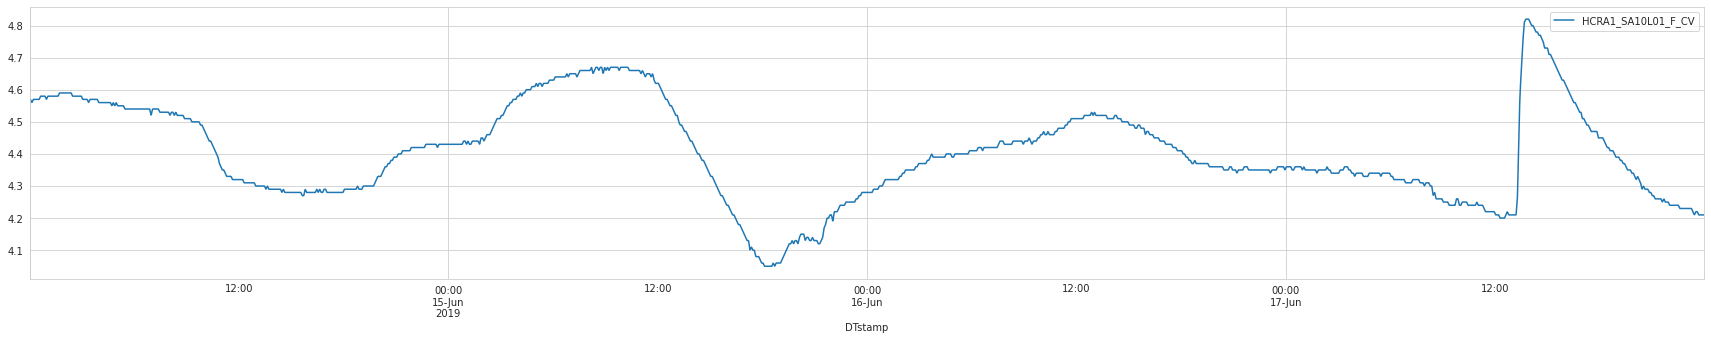

In [ ]:
df2.plot( y=['HCRA1_SA10L01_F_CV'], figsize=(30,5), grid=True,use_index=True)

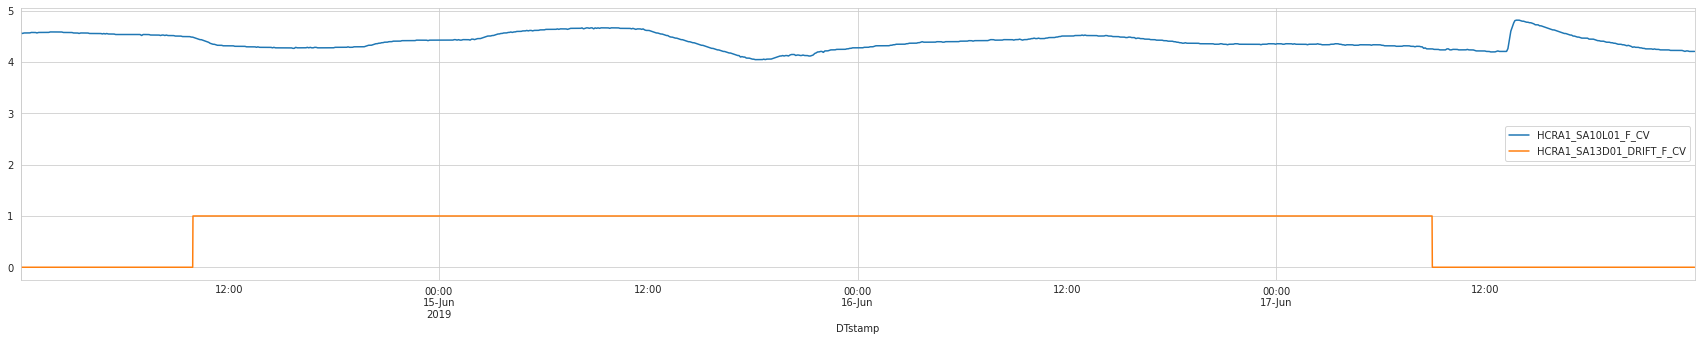

In [ ]:
df2.plot( y=['HCRA1_SA10L01_F_CV', 'HCRA1_SA13D01_DRIFT_F_CV'], figsize=(30,5), grid=True,use_index=True)

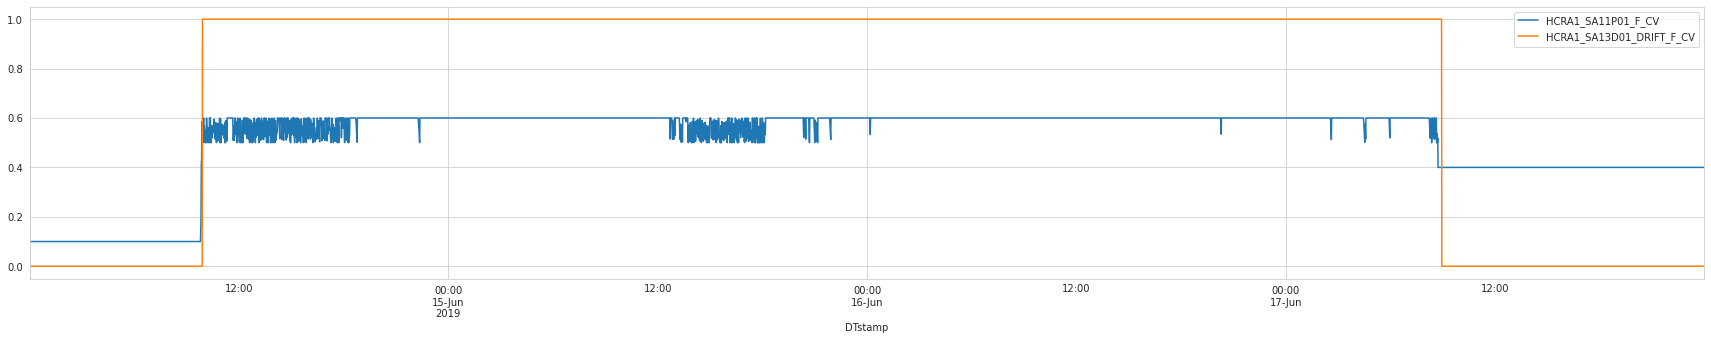

In [ ]:
#check pressure of feed pump
df2.plot( y=['HCRA1_SA11P01_F_CV', 'HCRA1_SA13D01_DRIFT_F_CV'], figsize=(30,5), grid=True,use_index=True)

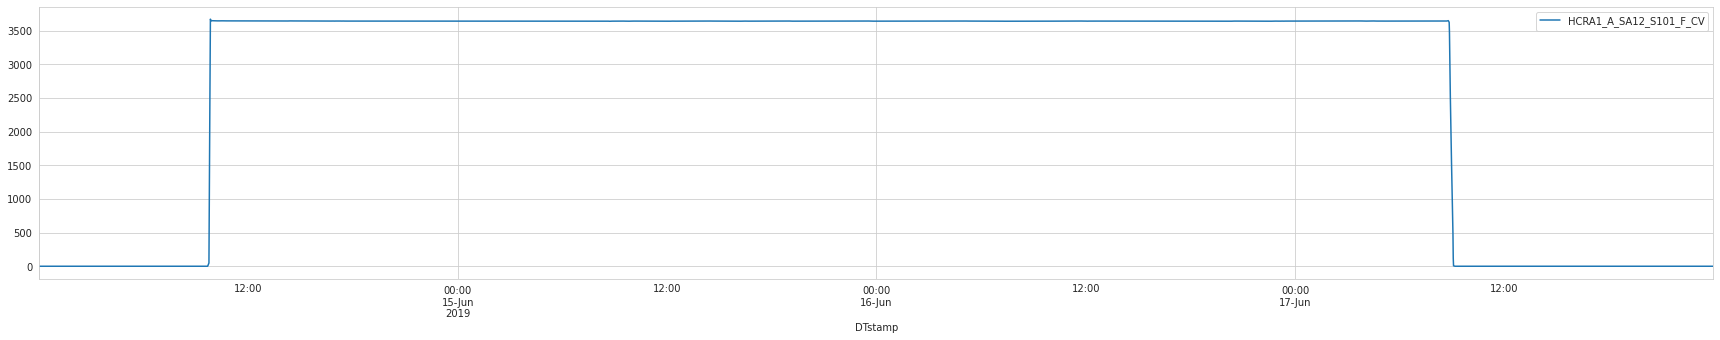

In [ ]:
# speed of centrifuge
df2.plot( y=['HCRA1_A_SA12_S101_F_CV'], figsize=(30,5), grid=True,use_index=True)

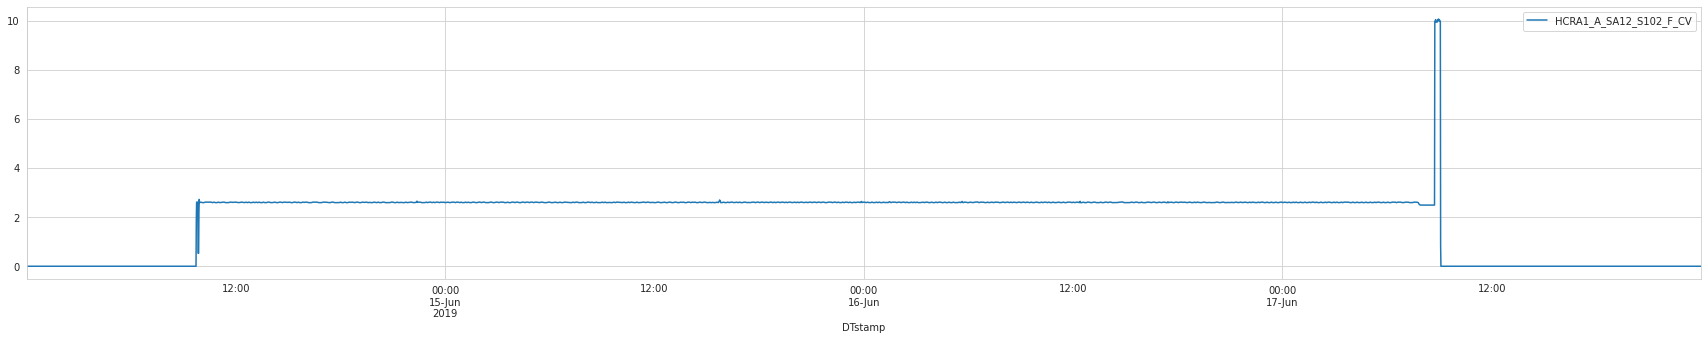

In [ ]:
# differential RPM
df2.plot( y=['HCRA1_A_SA12_S102_F_CV'], figsize=(30,5), grid=True,use_index=True)

# Scenario 2 - Normal Stop scenario due to low sludge level in the buffer tank (stop noted at 2019-07-24 16:28:00)

In [ ]:
#check sludge level in the buffer
#check pressure level in the pump
#check differential RPM

In [ ]:
df2 = pd.DataFrame(data_centrifuge1.loc['2019-07-24 00:01:00':'2019-07-24 23:59:59', features_considered])


In [ ]:
df2.head()

,HCRA1_SA10L01_F_CV,HCRA1_SA11P01_F_CV,HCRA1_SA13D01_DRIFT_F_CV,HCRA1_A_SA12_S101_F_CV,HCRA1_A_SA12_S102_F_CV
DTstamp,,,,,
2019-07-24 00:01:00,2.986667,0.600,1.0,3651.0,2.690333
2019-07-24 00:02:00,2.984667,0.600,1.0,3651.0,2.691833
2019-07-24 00:03:00,2.982667,0.600,1.0,3651.0,2.693833
2019-07-24 00:04:00,2.980667,0.600,1.0,3651.0,2.695833
2019-07-24 00:05:00,2.980000,0.598,1.0,3651.0,2.697833


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1439 entries, 2019-07-24 00:01:00 to 2019-07-24 23:59:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HCRA1_SA10L01_F_CV        1439 non-null   float64
 1   HCRA1_SA11P01_F_CV        1439 non-null   float64
 2   HCRA1_SA13D01_DRIFT_F_CV  1439 non-null   float64
 3   HCRA1_A_SA12_S101_F_CV    1439 non-null   float64
 4   HCRA1_A_SA12_S102_F_CV    1439 non-null   float64
dtypes: float64(5)
memory usage: 67.5 KB


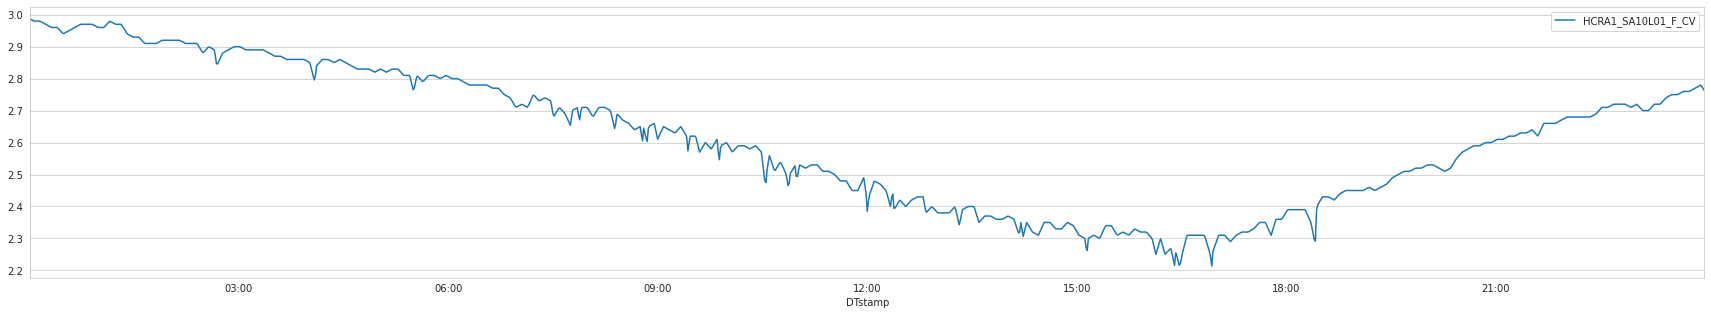

In [ ]:
df2.plot( y=['HCRA1_SA10L01_F_CV'], figsize=(30,5), grid=True,use_index=True)

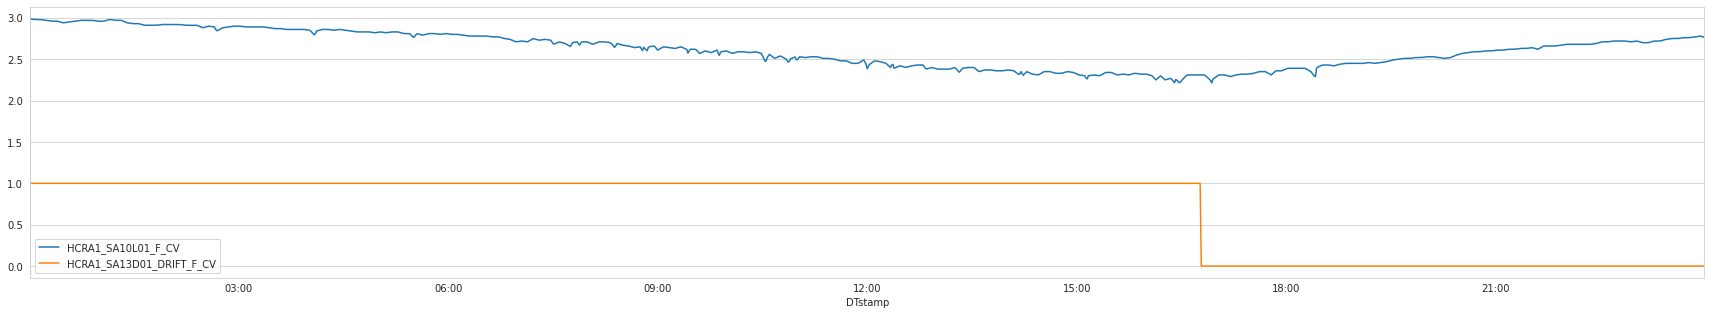

In [ ]:

df2.plot( y=['HCRA1_SA10L01_F_CV', 'HCRA1_SA13D01_DRIFT_F_CV'], figsize=(30,5), grid=True,use_index=True)

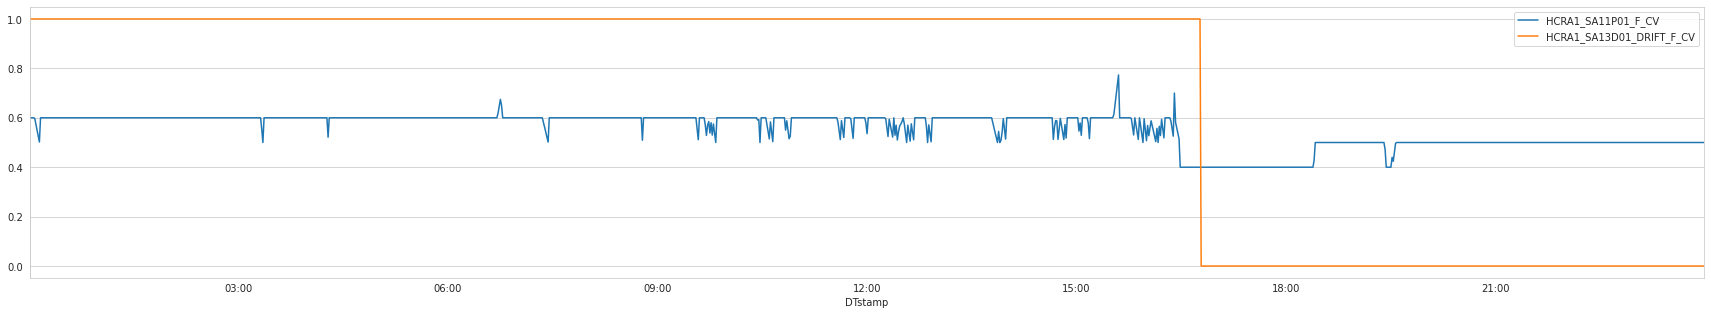

In [ ]:
#check pressure of feed pump
df2.plot( y=['HCRA1_SA11P01_F_CV', 'HCRA1_SA13D01_DRIFT_F_CV'], figsize=(30,5), grid=True,use_index=True)

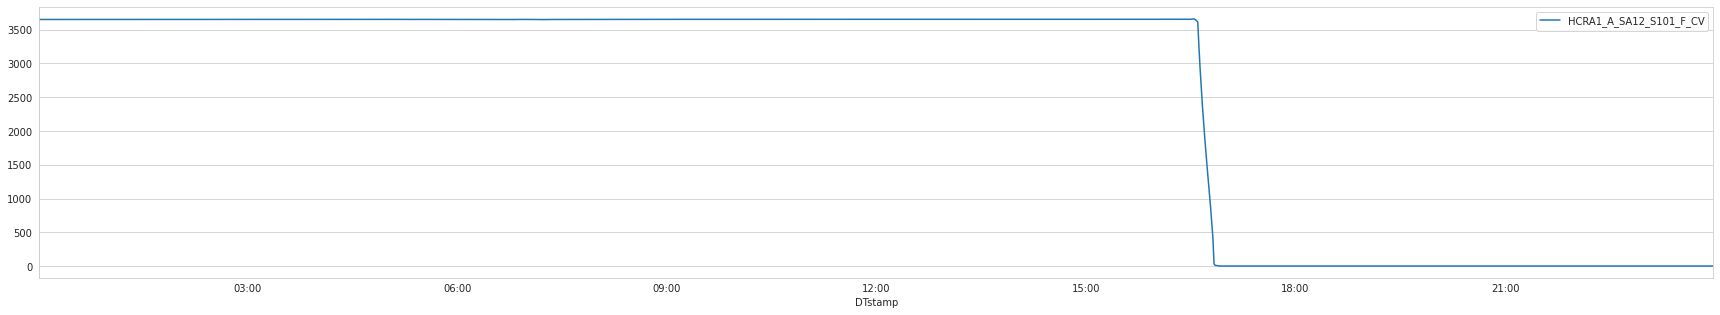

In [ ]:
# speed of centrifuge
df2.plot( y=['HCRA1_A_SA12_S101_F_CV'], figsize=(30,5), grid=True,use_index=True)

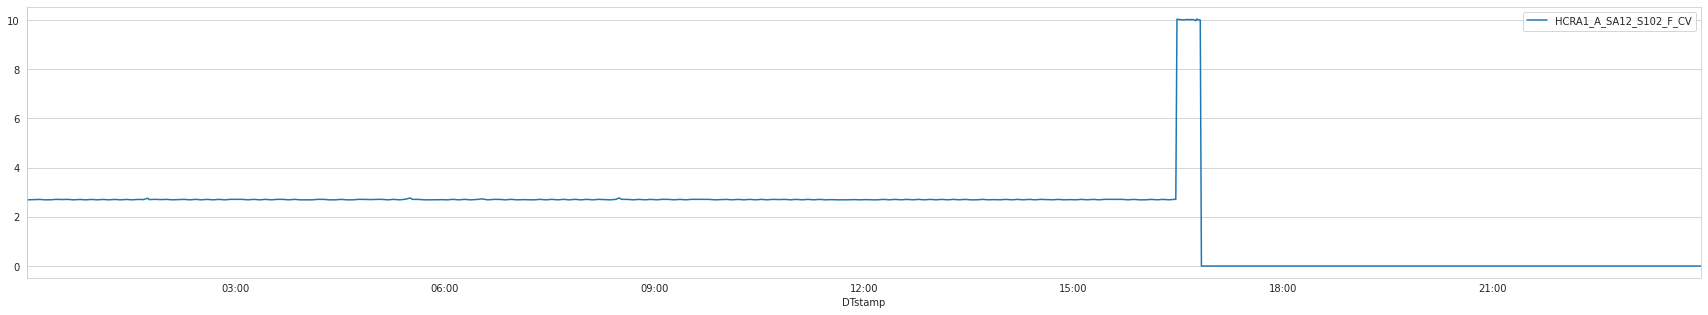

In [ ]:
# differential RPM
df2.plot( y=['HCRA1_A_SA12_S102_F_CV'], figsize=(30,5), grid=True,use_index=True)

In [ ]:
# Conclusion - Sludge level is decreasing with all the other parameters in normal . So cause of the stop is low sludge level in the buffer tank



## Scenario 3 - Unwanted , Uncontrolled stop (Critical stop) scenario noted on 19/9 2019  around 8:20

In [ ]:
df2 = pd.DataFrame(data_centrifuge1.loc['2019-09-17 00:01:00':'2019-09-19 23:59:59', features_considered])



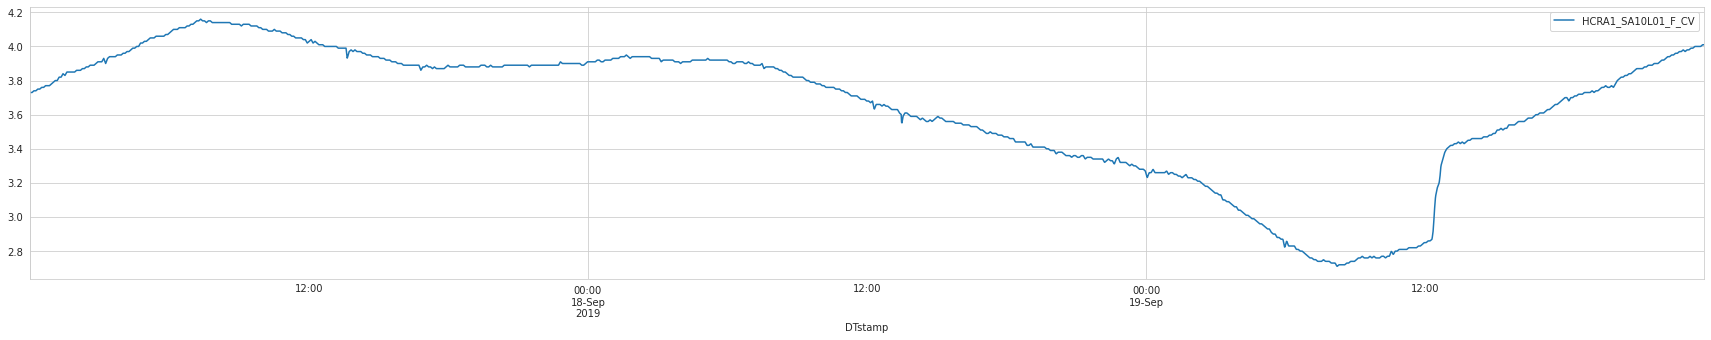

In [ ]:
df2.plot( y=['HCRA1_SA10L01_F_CV'], figsize=(30,5), grid=True,use_index=True)

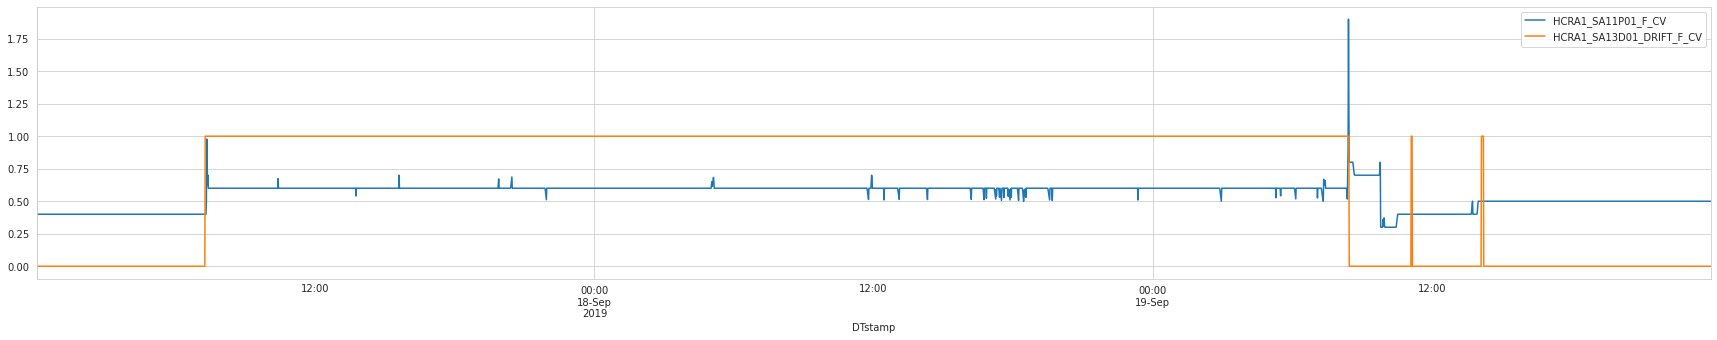

In [ ]:
#check pressure of feed pump
df2.plot( y=['HCRA1_SA11P01_F_CV', 'HCRA1_SA13D01_DRIFT_F_CV'], figsize=(30,5), grid=True,use_index=True)

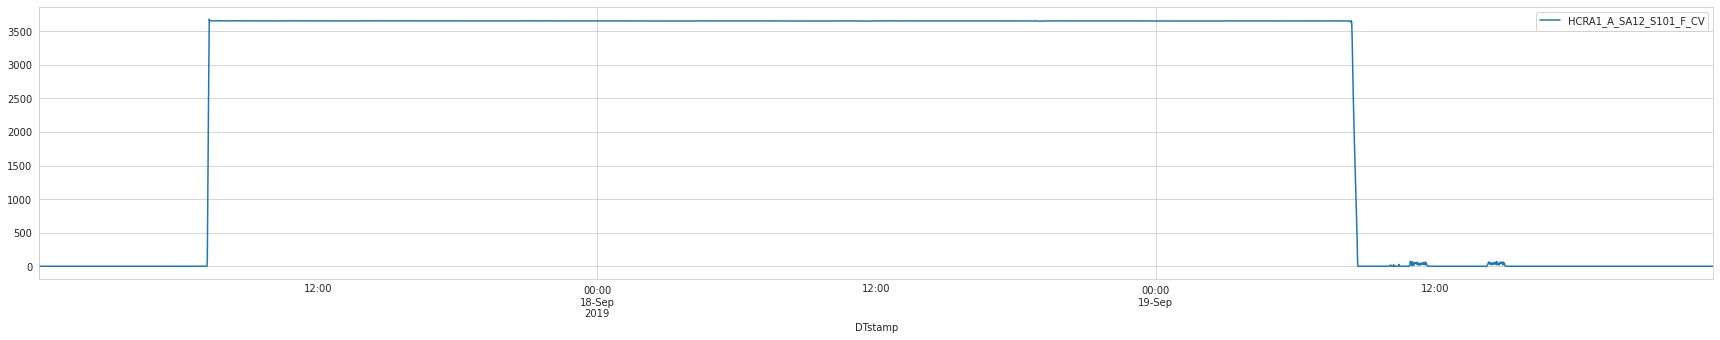

In [ ]:
# speed of centrifuge
df2.plot( y=['HCRA1_A_SA12_S101_F_CV'], figsize=(30,5), grid=True,use_index=True)

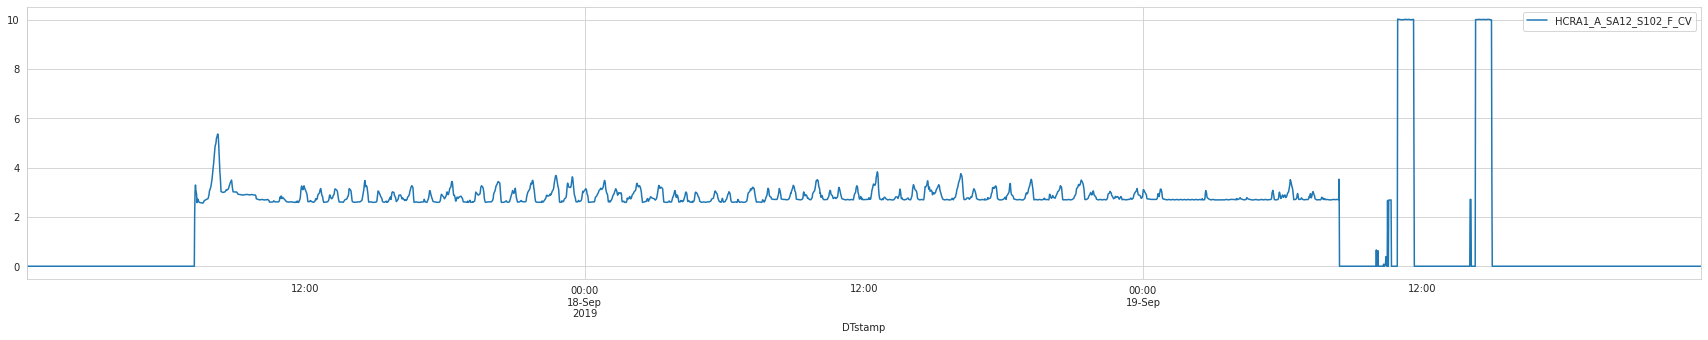

In [ ]:
# differential RPM
df2.plot( y=['HCRA1_A_SA12_S102_F_CV'], figsize=(30,5), grid=True,use_index=True)

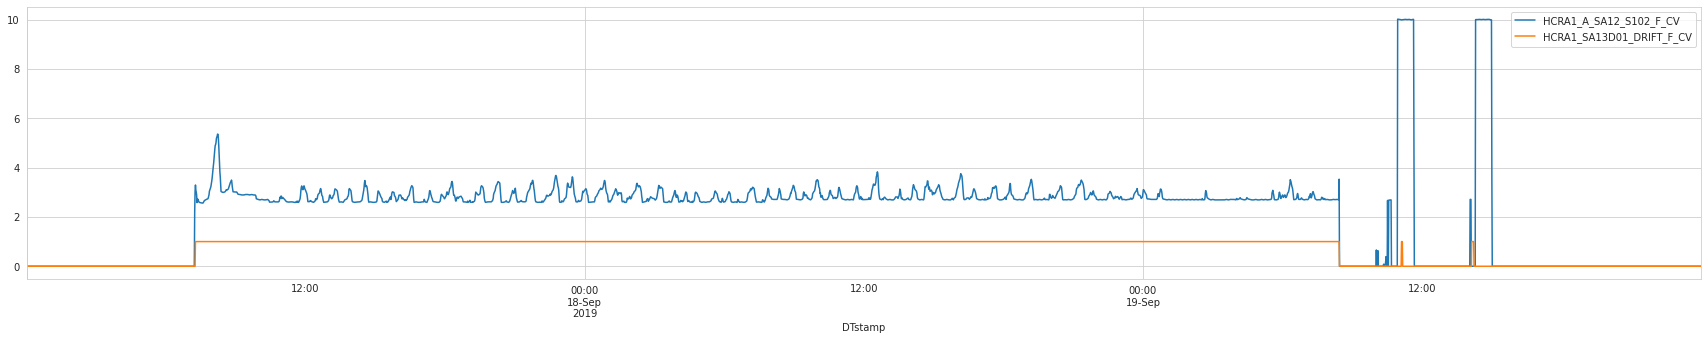

In [ ]:
#differential RPM
df2.plot( y=['HCRA1_A_SA12_S102_F_CV', 'HCRA1_SA13D01_DRIFT_F_CV'], figsize=(30,5), grid=True,use_index=True)

## Conclusion - The differential RPM is set by the manufacturer depending on the need of the costumer. The fluctuations in differential RPM is causing an imbalance between centrifuge bowl speed and scroll. A piece of centrifuge is broken as a result of this fluctuation. When fluctuations are observed it is always good to calibrate differential rpm and do preventive maintanence.

Reference - https://www.centrisys-cnp.com/decanter-centrifuge-operations-guide#Optimal-Differential